In [1]:
import numpy as np
import mglearn

# 비지도 학습
비지도 학습은 크게 비지도 변환과 군집이 있다.

### 비지도 변환
데이터를 새롭게 표현해서 데이터를 좀 뒤 쉽게 사람이 볼 수 있도록, 새롭게 표현하는 방식
고차원 데이터를 특성을 줄이면서, 차원 축소를 하는 방법으로 데이터셋을 2차원으로 바꾸는 등을 말한다.
데이터를 구성하는 단위나 성분을 찾기도 하며, 많은 텍스트 문서에서 주제를 추출하는 것이 이런 예시이다.

예시 : 총기 규제, 선거, 토론 주제 추적 등

### 군집
데이터를 비슷한 그룹으로 묶는 것을 말한다.
예시 : 소셜 미디어 사이트 업로드 사진 분류

## 비지도 학습의 도전 과제
가장 어려운 일을 고르자면 역시 알고리즘이 뭔가 유용한 것을 학습했는지 평가하는 것을 말한다.
레이블이 없는 데이터에 적용하기 때문에 무엇이 올바른 출력인지 모른다. 
예로들어 옆으로 찍힌 사진이나 앞으로 찍힌 사진을 구분할 수 있지만, 이는 우리가 원하는 방향이 아니다. 그러나 이 알고리즘은 우리가 원하는 것을 알려줄 방법이 없다는 단점이 있다.

이런 이유로 이 학습 알고리즘은 보통 데이터를 더 잘 이해하고 싶을 때 탐색적 분석 단계로 많이 사용한다.

In [7]:
# 데이터 전처리와 스케일 조정
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, random_state = 1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [9]:
# MinMaxScaler는 모든 특성을 0~1 사이에 위치하도록 변경해주는 함수이다.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# 위 조건에 맞춰서 훈련 데이터를 적용한다.
scaler.fit(X_train)

MinMaxScaler()

In [8]:
# 데이터 변환
X_train_scaler = scaler.transform(X_train)
# 스케일이 적용된 뒤 데이터셋의 속성을 출력합니다.
print("변환된 후 크기 : ", X_train_scaler.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", X_train_scaler.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_train_scaler.max(axis=0))

# 변환된 데이터의 배열 크기는 원래의 데이터 배열과 크기가 동일하다.

변환된 후 크기 :  (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [10]:
X_test_scaler = scaler.transform(X_test)

print("스케일 조정 후 특성별 최소값:\n", X_test.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_test.max(axis=0))

스케일 조정 후 특성별 최소값:
 [7.691e+00 1.038e+01 4.834e+01 1.704e+02 6.828e-02 3.116e-02 0.000e+00
 0.000e+00 1.365e-01 4.996e-02 1.115e-01 3.871e-01 8.484e-01 7.228e+00
 2.866e-03 3.746e-03 0.000e+00 0.000e+00 7.882e-03 1.087e-03 8.678e+00
 1.420e+01 5.449e+01 2.236e+02 8.774e-02 5.131e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
스케일 조정 후 특성별 최대값:
 [2.722e+01 3.381e+01 1.821e+02 2.250e+03 1.425e-01 3.454e-01 3.754e-01
 1.878e-01 2.906e-01 9.744e-02 1.292e+00 2.612e+00 1.012e+01 1.587e+02
 1.604e-02 1.006e-01 3.038e-01 3.322e-02 7.895e-02 1.220e-02 3.312e+01
 4.178e+01 2.208e+02 3.216e+03 2.098e-01 1.058e+00 1.252e+00 2.688e-01
 6.638e-01 2.075e-01]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


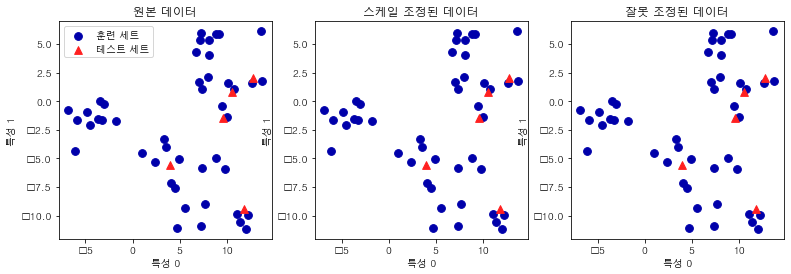

In [10]:
%matplotlib inline
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family=font_name)

# 인위적인 데이터셋 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도를 그립니다.
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler를 사용해 스케일을 조정합니다.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다.
axes[1].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[1].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정합니다.
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다.
# 이는 예제를 위한 것으로, 절대로 이렇게 사용해서는 안된다!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaler_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다.
axes[2].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[2].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes : 
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

In [20]:
from sklearn.svm import SVC

X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, Y_train)
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test, Y_test)))

테스트 세트 정확도 : 0.94


In [21]:
# 0~1 사이로 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, Y_train)

# 스케일 조정된 테스트 세트의 정확도
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test_scaled, Y_test)))

테스트 세트 정확도 : 0.97


In [22]:
# 평균 0, 분산 1을 갖도록 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, Y_train)

# 스케일 조정된 테스트 세트의 정확도
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test_scaled, Y_test)))

테스트 세트 정확도 : 0.96


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


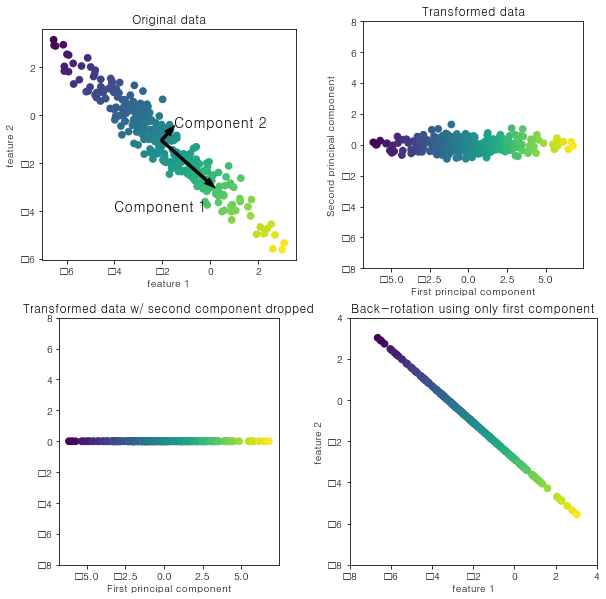

In [23]:
mglearn.plots.plot_pca_illustration()

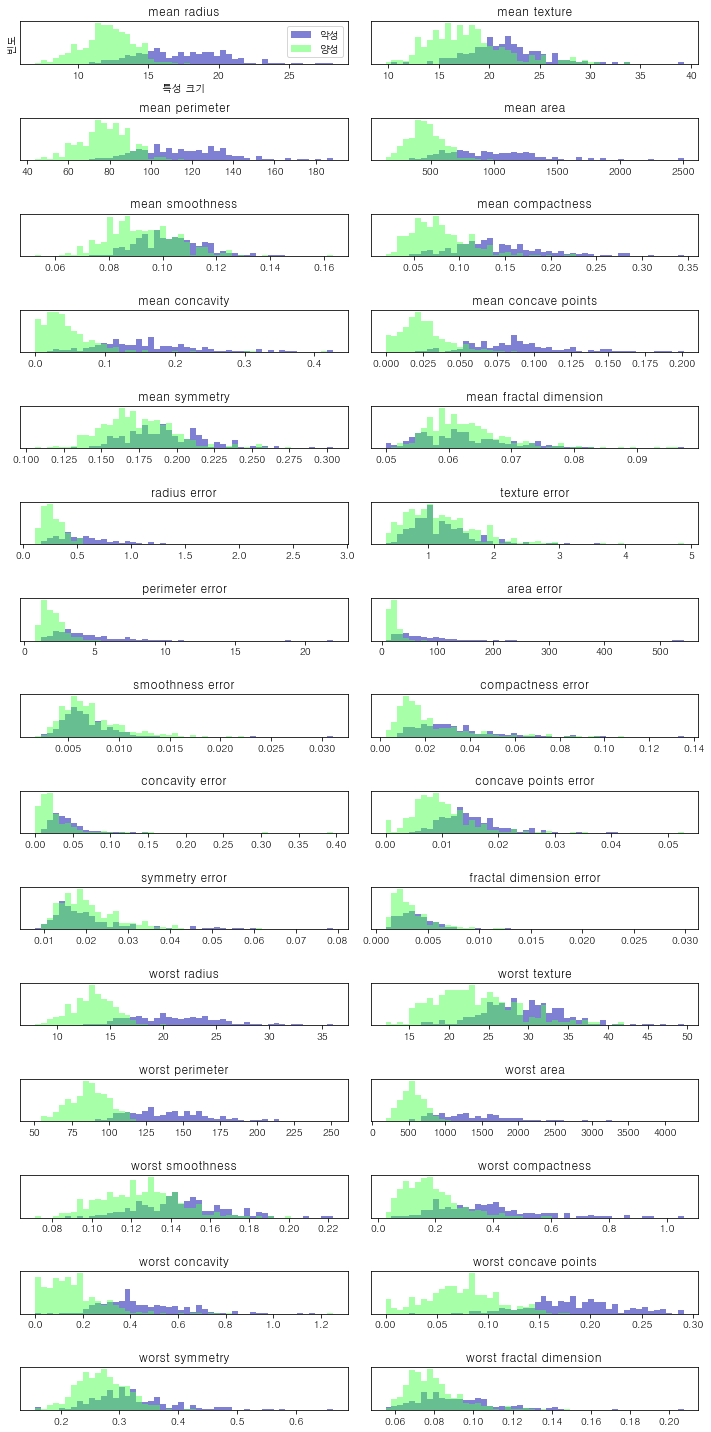

In [26]:
fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30) : 
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

In [28]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [29]:
# PCA 변환
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만듭니다.
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다.
X_pca = pca.transform(X_scaled)

print("원본 세트 정확도 : ", str(X_scaled.shape))
print("축소된 세트 정확도 : ", str(X_pca.shape))

원본 세트 정확도 :  (569, 30)
축소된 세트 정확도 :  (569, 2)


Text(0, 0.5, '두 번째 주성분')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


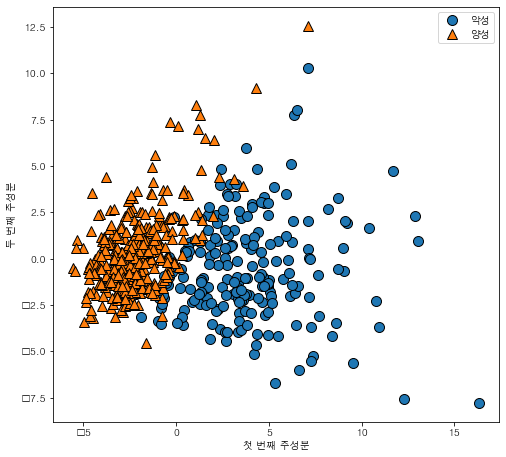

In [30]:
# 클래스를 색깔로 구분하여 추음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0],X_pca[:, 1],cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [31]:
print("PCA 주성분 형태 : ", pca.components_.shape)

PCA 주성분 형태 :  (2, 30)


In [32]:
print("PCA 주성분 : ", pca.components_)

PCA 주성분 :  [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '두 번째 주성분')

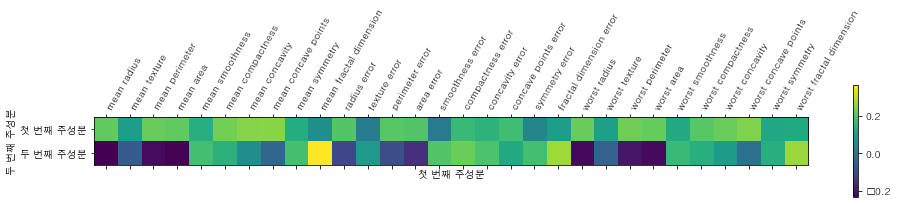

In [35]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

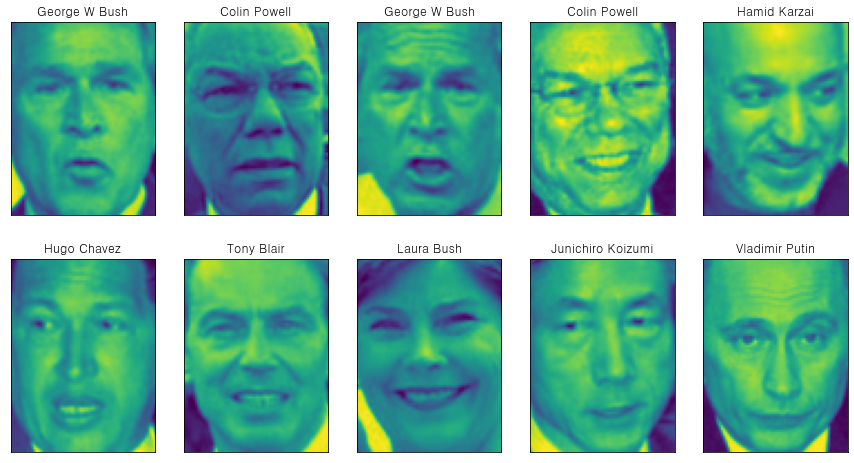

In [38]:
# 고유 얼굴 특성 추출
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()) : 
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [39]:
print("people.images.shape:", people.images.shape)
print("클래스 개수 : ", len(people.target_names))

people.images.shape: (2489, 87, 65)
클래스 개수 :  43


In [40]:
# 각 타깃이 나타낸 횟수 계산
counts = np.bincount(people.target)
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)) : 
    print("{0:25}, {1:3}".format(name, count), end='\t')
    if(i + 1) % 3 == 0 : 
        print()

Alejandro Toledo         ,  39	Alvaro Uribe             ,  35	Amelie Mauresmo          ,  21	
Andre Agassi             ,  36	Ariel Sharon             ,  77	Atal Bihari Vajpayee     ,  24	
Bill Clinton             ,  29	Colin Powell             , 236	David Beckham            ,  31	
Donald Rumsfeld          , 121	George Robertson         ,  22	George W Bush            , 530	
Gerhard Schroeder        , 109	Gloria Macapagal Arroyo  ,  44	Gray Davis               ,  26	
Hamid Karzai             ,  22	Hans Blix                ,  39	Hugo Chavez              ,  71	
Igor Ivanov              ,  20	Jack Straw               ,  28	Jacques Chirac           ,  52	
Jean Chretien            ,  55	Jennifer Aniston         ,  21	Jennifer Capriati        ,  42	
John Ashcroft            ,  53	Juan Carlos Ferrero      ,  28	Junichiro Koizumi        ,  60	
Kofi Annan               ,  32	Laura Bush               ,  41	Lindsay Davenport        ,  22	
Lleyton Hewitt           ,  41	Megawati Sukarnoputri    ,  3

In [41]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target) : 
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
Y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정한다.
X_people = X_people / 255

In [45]:
# 간단하게 KNN 분류를 이용해서 확인하자~
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X_people, Y_people, stratify=Y_people, random_state = 0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
print("테스트 세트 정확도 : {:.2f}".format(knn.score(X_test, Y_test)))

테스트 세트 정확도 : 0.27


In [46]:
pca = PCA(n_components = 100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)

X_train_pca.shape: (1146, 100)


In [49]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, Y_train)
print("테스트 세트 정확도 : {:.2f}".format(knn.score(X_test_pca, Y_test)))

테스트 세트 정확도 : 0.38


In [51]:
print("pca.components_.shape:", pca.components_.shape)

pca.components_.shape: (100, 5655)


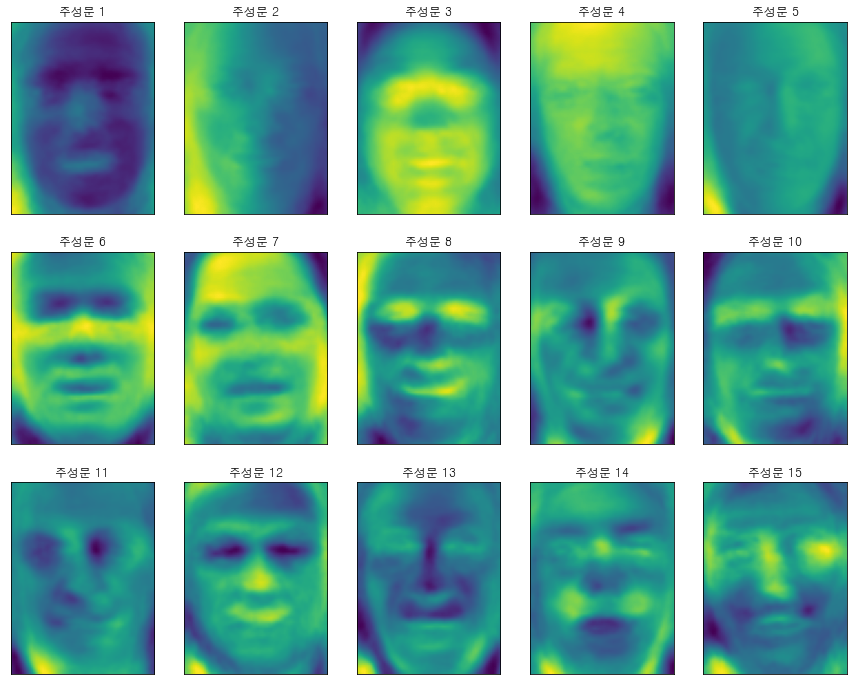

In [53]:
fig, axes = plt.subplots(3,5, figsize=(15, 12), subplot_kw={'xticks':(), 'yticks':()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())) : 
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분 {}".format((i + 1)))

Text(0, 0.5, '두 번째 주성분')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


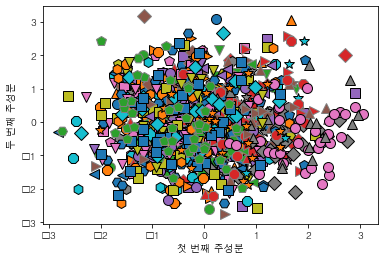

In [55]:
# 위에 있는 데이터를 산점도로 표현한다.
mglearn.discrete_scatter(X_train_pca[:, 0],X_train_pca[:, 1],Y_train)
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. 

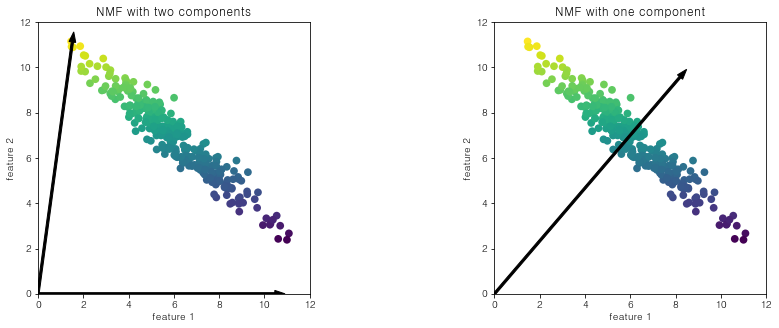

In [56]:
# NFM(비음수 행렬 분해)
# 유용한 특성을 뽑아낼 수 있는 비지도 학습 알고리즘 
mglearn.plots.plot_nmf_illustration()

In [59]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.827451, ..., 0.168627],
       ...,
       [0.447059, ..., 0.79085 ]], dtype=float32), 
array([[0.909804, ..., 0.484967],
       ...,
       [0.607843, ..., 0.820915]], dtype=float32))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


KeyboardInterrupt: 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


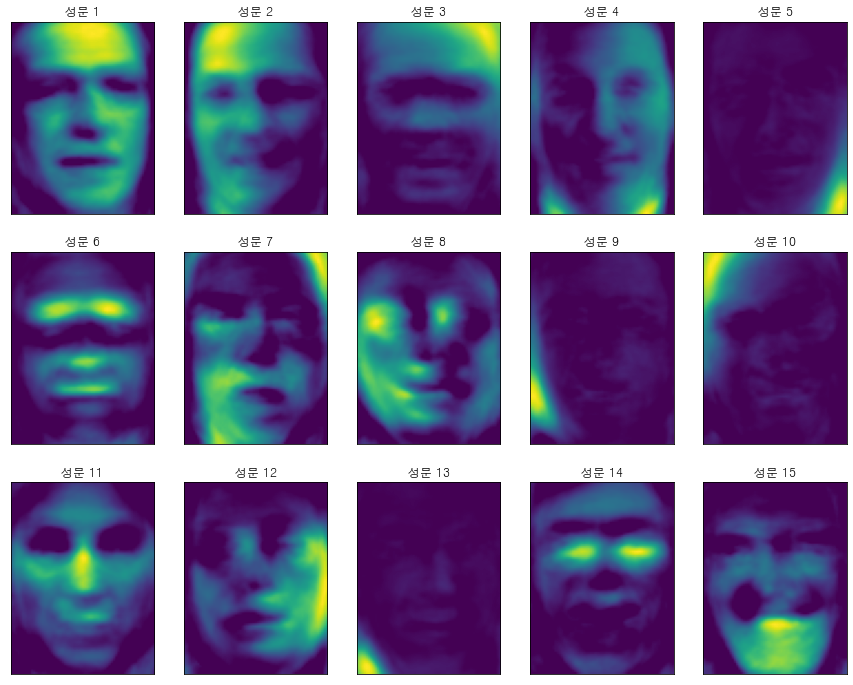

In [62]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3,5, figsize=(15, 12), subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())) : 
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("성분 {}".format((i + 1)))

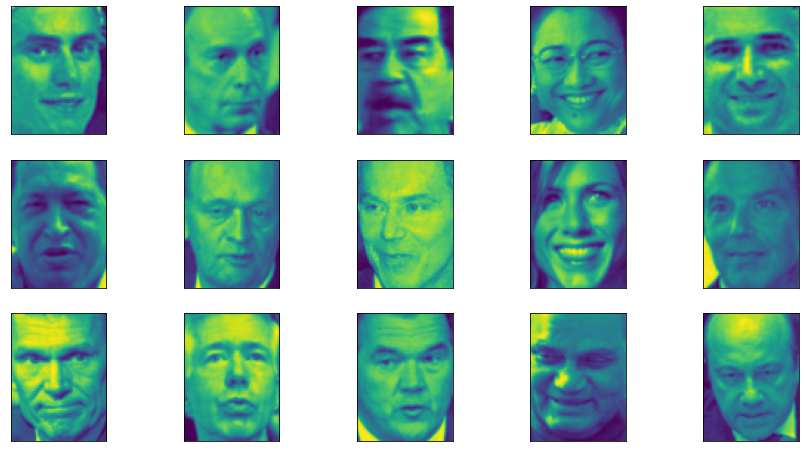

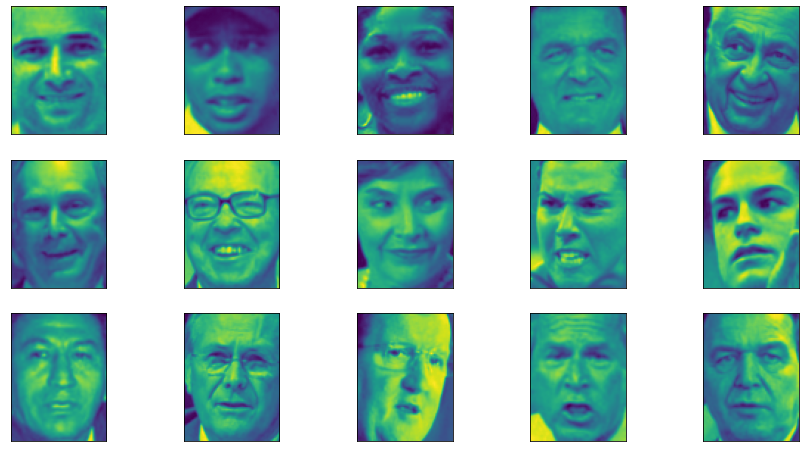

In [64]:
compn = 3
inds = np.argsort(X_train_nmf[:, compn][::-1])

fig, axes = plt.subplots(3,5, figsize=(15, 8), subplot_kw={'xticks':(), 'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())) : 
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn = 7
inds = np.argsort(X_train_nmf[:, compn][::-1])

fig, axes = plt.subplots(3,5, figsize=(15, 8), subplot_kw={'xticks':(), 'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())) : 
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, '신호')

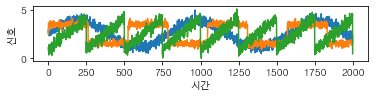

In [78]:
# 신호 값을 하나 생성한다.
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S, '-')
plt.xlabel("시간")
plt.ylabel("신호")

In [71]:
# 원본 데이터를 사용해서 100개의 측정 데이터를 만든다.
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print("측정 데이터 형태 : ", X.shape)

측정 데이터 형태 :  (2000, 100)


In [72]:
nmf = NMF(n_components=3, random_state=42, max_iter=1000, tol=1e-2)
S_ = nmf.fit_transform(X)
print("복원된 신호 데이터 형태 : ", S.shape)

복원된 신호 데이터 형태 :  (2000, 3)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


In [73]:
H = pca.fit_transform(X)

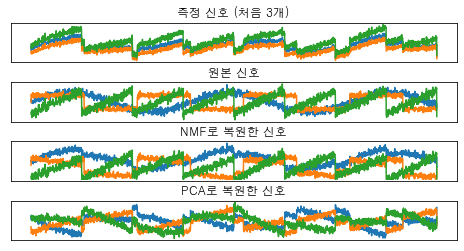

In [76]:
models = [X, S, S_, H]
names = ['측정 신호 (처음 3개)', '원본 신호', 'NMF로 복원한 신호', 'PCA로 복원한 신호']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace':.5}, subplot_kw={'xticks':(), 'yticks':()})

# 아래 사진을 보면 알 수 있드시 PCA에선 복원이 실패했다.
# 또한 NMF는 원본 신호와 모양은 같으나, 순서는 없다.
for model, name, ax in zip(models, names, axes) : 
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

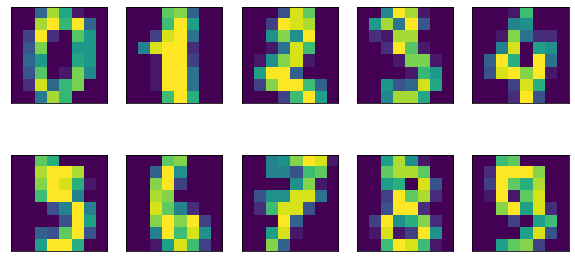

In [77]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2,5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images) : 
    ax.imshow(img)

Text(0, 0.5, '첫 번째 주성분')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


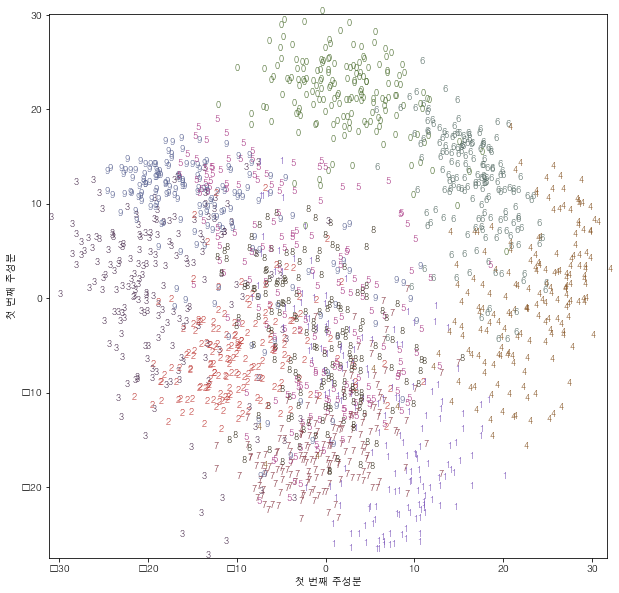

In [79]:
# PCA 모델을 생성합니다.
pca = PCA(n_components=2)
pca.fit(digits.data)

# 처음 두 개의 주성분으로 숫자 데이터를 변환합니다.
digits_pca = pca.transform(digits.data)
colors = ['#476A2A','#7851B8','#BD3430','#4A2D4E','#875525','#A83683','#4E655E','#853541','#3A3120','#535D8E']
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)) : 
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight' : 'bold', 'size' : 9})
    
plt.xlabel("첫 번째 주성분")
plt.ylabel("첫 번째 주성분")

In [80]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

# TSNE엔 transform 메서드가 없다.
digits_tsne = tsne.fit_transform(digits.data)



Text(0, 0.5, 'T-SNE 번째 주성분 2')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


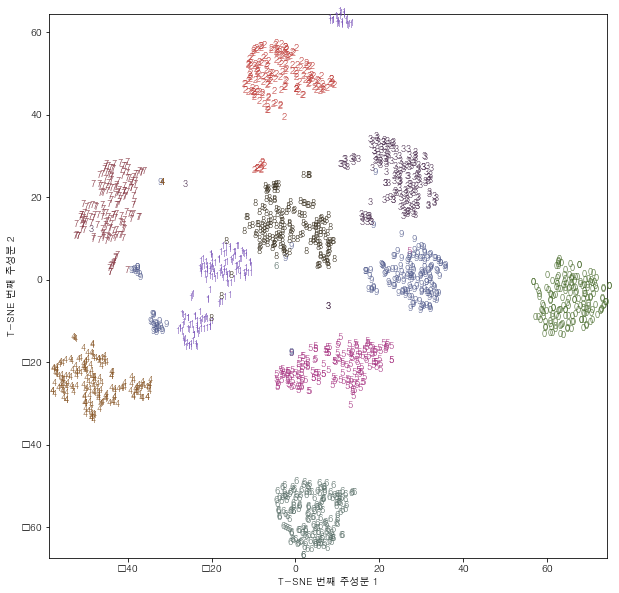

In [81]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:, 0].max())
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:, 1].max())

for i in range(len(digits.data)) : 
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight' : 'bold', 'size' : 9})
    
plt.xlabel("T-SNE 번째 주성분 1")
plt.ylabel("T-SNE 번째 주성분 2")

## 군집
군집은 데이터셋을 클러스터라는 그룹으로 나누는 작업을 하는 과정이다.

### 

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, Y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [13]:
print("클러스터 레이블:\n{}".format(kmeans.labels_))

클러스터 레이블:
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [14]:
print(kmeans.predict(X))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


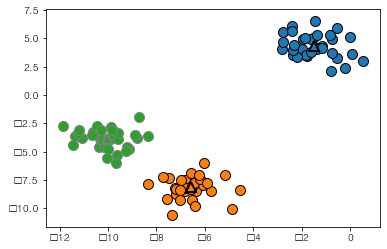

In [15]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0,1,2], markers='^', markeredgewidth=2)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


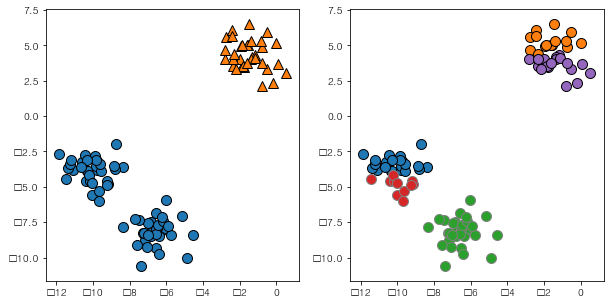

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax = axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, markers='o', ax = axes[1])

In [ ]:
# K-mean 알고리즘이 실패하는 경우
# 